# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data[:, [0,3]]  # Only take the first two features for easy visualization
y = iris.target

y = (y != 0) * 1  # Setosa vs. non-setosa


# Split

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Standardize

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Different SVM Kernel

In [6]:
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(8, 6))
    
    # Plot decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Linear

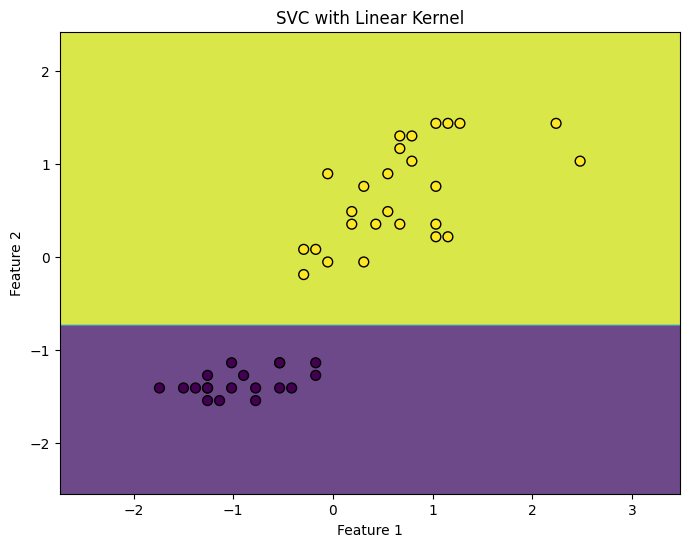

In [7]:
clf_linear = SVC(kernel='linear', C=1)
clf_linear.fit(X_train, y_train)
plot_decision_boundary(clf_linear, X_test, y_test, "SVC with Linear Kernel")

# Polynomial Kernel

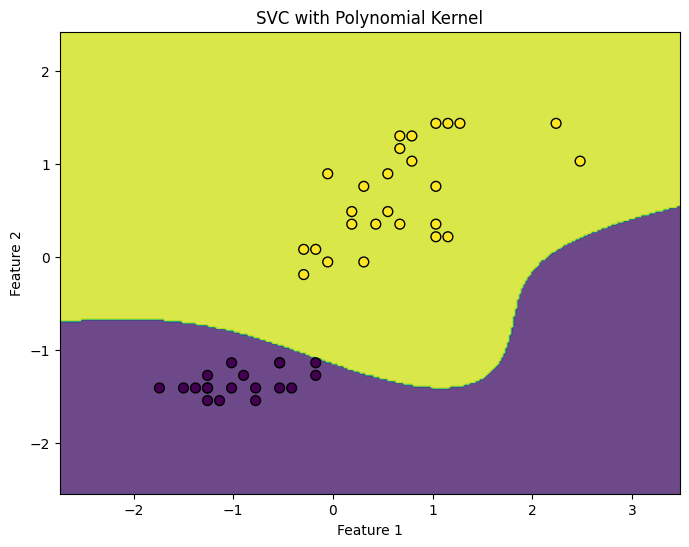

In [8]:
clf_poly = SVC(kernel='poly', degree=3, C=1)
clf_poly.fit(X_train, y_train)
plot_decision_boundary(clf_poly, X_test, y_test, "SVC with Polynomial Kernel")

# RBF Kernel

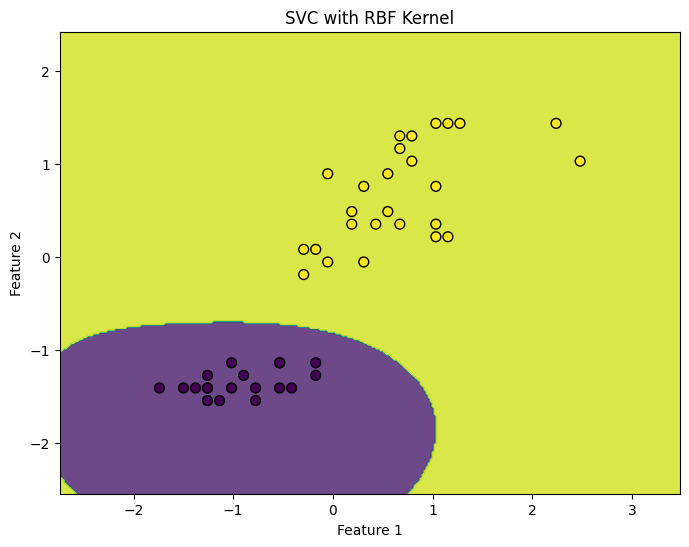

In [9]:
clf_rbf = SVC(kernel='rbf', gamma=0.5, C=1)
clf_rbf.fit(X_train, y_train)
plot_decision_boundary(clf_rbf, X_test, y_test, "SVC with RBF Kernel")


# Sigmoid Kernel

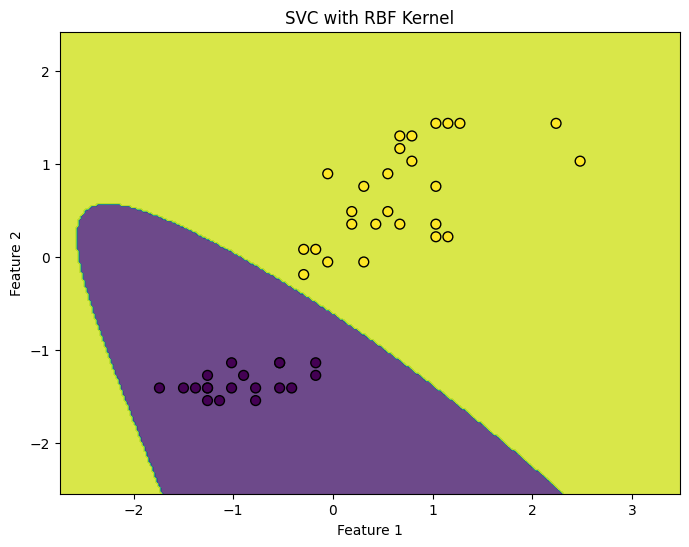

In [10]:
clf_rbf = SVC(kernel='sigmoid', gamma=0.5, C=1)
clf_rbf.fit(X_train, y_train)
plot_decision_boundary(clf_rbf, X_test, y_test, "SVC with RBF Kernel")


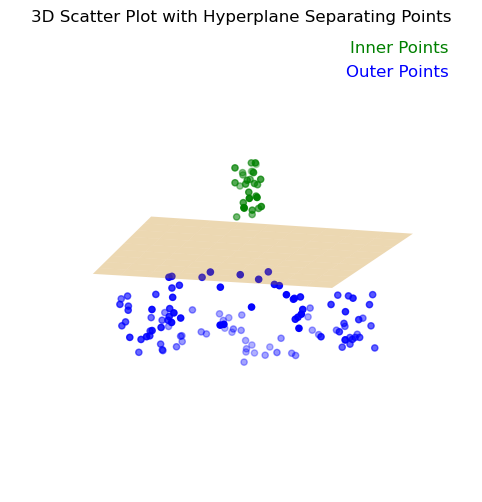

In [3]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
import numpy as np
# Function to generate points and plot
def create_plot():
    # Clear the current plot
    ax.cla()
    # Number of points to generate
    num_inner_points = 29
    num_outer_points = 111
    # Radius settings
    inner_radius = 0.35  # for inner points
    outer_radius_min = 2  # minimum distance from origin for outer points
    outer_radius_max = 3  # maximum distance from origin for outer points
    # Generate inner points (green) within a smaller radius
    inner_points = [(random.uniform(-inner_radius, inner_radius),
                     random.uniform(-inner_radius, inner_radius),
                     random.uniform(2, 5)) for _ in range(num_inner_points)]
    # Generate outer points (blue) within a larger circular boundary
    outer_points = []
    for _ in range(num_outer_points):
        angle = random.uniform(0, 2 * np.pi)  # Random angle
        radius = random.uniform(outer_radius_min, outer_radius_max)  # Random radius within bounds
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        z = random.uniform(-5, -2)  # Z values for outer points
        outer_points.append((x, y, z))
    # Plot inner points in green
    inner_x, inner_y, inner_z = zip(*inner_points)
    ax.scatter(inner_x, inner_y, inner_z, color='green', label='Inner Points')
    # Plot outer points in blue
    outer_x, outer_y, outer_z = zip(*outer_points)
    ax.scatter(outer_x, outer_y, outer_z, color='blue', label='Outer Points')
    # Add labels for the inner and outer points in the top right
    ax.text2D(0.95, 0.95, 'Inner Points', transform=ax.transAxes, color='green', fontsize=12, ha='right')
    ax.text2D(0.95, 0.90, 'Outer Points', transform=ax.transAxes, color='blue', fontsize=12, ha='right')
    # Draw a hyperplane (a flat plane) to separate the points
    # Plane equation coefficients (A, B, C, D) - you can adjust these for different orientations
    A, B, C, D = 0, 0, 1, 0  # This defines the plane z = 3.5
    xx, yy = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
    zz = (-A * xx - B * yy - D) * 1.0 / C  # Solve for z
    # Plot the hyperplane
    ax.plot_surface(xx, yy, zz, alpha=0.3, color='orange', label='Hyperplane')
    # Turn off the axes
    ax.set_axis_off()
    # Set title
    ax.set_title('3D Scatter Plot with Hyperplane Separating Points')
    # Draw the plot
    canvas.draw()
# Create the main Tkinter window
root = tk.Tk()
root.title("3D Scatter Plot with Tkinter")
# Create a Matplotlib figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Create a canvas to embed the Matplotlib figure
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
# Create a button to generate the plot
button = tk.Button(root, text="Generate Plot", command=create_plot)
button.pack(side=tk.BOTTOM)
# Start the Tkinter main loop
create_plot()  # Initial plot
root.mainloop()

# Explore about C and Gamma